### Data Analysis NAC 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
NAC_data = 'NAC_data.csv'
file = pd.read_csv(NAC_data)
NAC_data_df = pd.DataFrame(file)
print(NAC_data_df)

       Unnamed: 0          Player                   Team  \
0               0     P. Iemmello              Catanzaro   
1               1  J. Petriccione                Crotone   
2               2       T. Biasci              Catanzaro   
3               3   E. Volpicelli       Sangiuliano City   
4               4       A. Curcio              Catanzaro   
...           ...             ...                    ...   
16530       16530    C. Nguyen Do           Slavia Sofia   
16531       16531     K. Stoyanov           Slavia Sofia   
16532       16532    B. Bozhurkin             Hebar 1918   
16533       16533       M. Petkov  Ceahlăul Piatra Neamţ   
16534       16534     I. Mihaylov        Septemvri Sofia   

      Team within selected timeframe         Position   Age  Market value  \
0                          Catanzaro               CF  31.0        750000   
1                            Crotone  DMF, RDMF, RCMF  28.0        700000   
2                          Catanzaro     CF, LWF

1. What is the average age of players in the dataset?

In [15]:
# Calculating the average age of players
avg_age = NAC_data_df['Age'].mean()
print(f'The average age of players is {avg_age}')

The average age of players is 25.233859744660254


2. Which team has the highest market value on average?

In [50]:
# Calculating the average market value for each team
team_avg_market_val = NAC_data_df.groupby('Team')['Market value'].mean().reset_index()

# Finding the team with the highest average market value
highest_market_val =  team_avg_market_val[team_avg_market_val['Market value'] == team_avg_market_val['Market value'].max()]['Team'].values[0]

print(highest_market_val)

Liverpool


3. How does the market value of players correlate with their age?

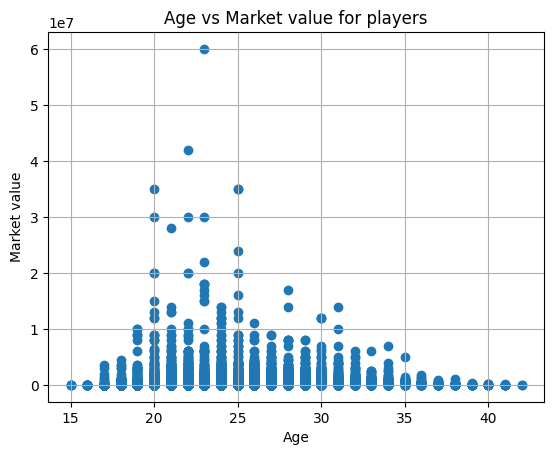

In [16]:
#Plotting age against market value
fig, ax = plt.subplots()
ax.scatter(NAC_data_df['Age'], NAC_data_df['Market value'])
ax.set_xlabel('Age')
ax.set_ylabel('Market value')
plt.title('Age vs Market value for players')
ax.grid()
plt.show()


PLayers between the ages of 20 and 25 (inclusive) have the highest market value. This suggests that the younger the player, the more valuable they are to a team.

4. What is the distribution of players' positions across different teams?

In [10]:
# Splitting the comma-separated positions into a new DataFrame
position_df = NAC_data_df['Position'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Position')

# Extracting the 'Team' column from the original DataFrame
team = NAC_data_df['Team']

# Grouping by both 'Team' and 'Position', then counting the occurrences
groupby_position = position_df.groupby([team, 'Position'])['Position'].count().sort_values(ascending=False)

print(groupby_position)

Team           Position
Bohemians      LB          8
IFK Göteborg   CF          8
FH             CF          7
Laagri         CF          7
Aris           RB          7
                          ..
Hutnik Kraków  LB          1
Huracán        LDMF        1
Hull City      RB          1
Huesca         RW          1
Levski Sofia   RDMF        1
Name: Position, Length: 10214, dtype: int64


5. Which country has the highest representation in the dataset in terms of player birthplace?

In [17]:
# Grouping by 'Birth country', count the number of players for each country, and sort in descending order
representation = NAC_data_df.groupby('Birth country')['Player'].count().sort_values(ascending = False).head(1)
print(representation)

Birth country
Italy    1866
Name: Player, dtype: int64


6. Is there a correlation between a player's height and weight and the number of goals scored?

          Height    Weight     Goals
Height  1.000000  0.825298  0.064992
Weight  0.825298  1.000000  0.063564
Goals   0.064992  0.063564  1.000000


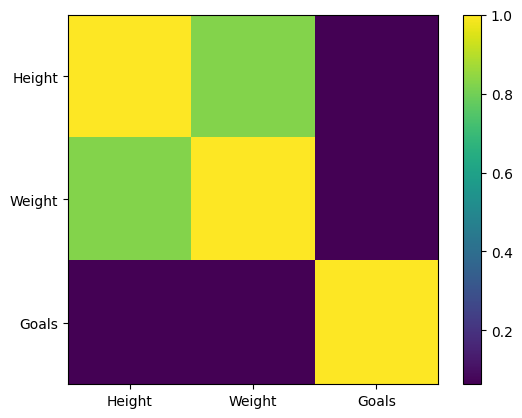

In [ ]:
fig, ax = plt.subplots()

# Calculating the correlation matrix for 'Height', 'Weight', and 'Goals'
player_correlation = NAC_data_df[['Height', 'Weight', 'Goals']].corr()
print(player_correlation)

# Creating a heatmap of the correlation matrix
img = ax.imshow(player_correlation, interpolation='none')
cbar = fig.colorbar(img)
ax.set_xticks(range(len(player_correlation.columns)))
ax.set_yticks(range(len(player_correlation.columns)))
ax.set_xticklabels(player_correlation.columns)
ax.set_yticklabels(player_correlation.columns)

plt.show()

There is a very strong correlation (almost 1) between height and weight.

7. How does the number of goals per player vary across different positions?

In [ ]:
# Selecting a subset of columns from the original DataFrame
to_use = NAC_data_df[['Player', 'Team', 'Position', 'Goals']]

# Grouping the data by 'Player', 'Team', and 'Position', and sum the 'Goals' for each group
grouped_data = to_use.groupby(['Player', 'Team', 'Position'], as_index=False)['Goals'].sum()

print(grouped_data)

              Player                     Team          Position  Goals
0          Dani Lual  SK Super Nova Salaspils       CF, AMF, LW      1
1       Álex Padilla          Bilbao Athletic                GK      0
2       A.  Lőrinczy                 Diósgyőr     AMF, CF, RCMF     10
3           A. Abbas       Maccabi Bnei Raina    LDMF, RW, LCMF      0
4       A. Abdennour                   Rodez                 CB      0
...              ...                      ...               ...    ...
15797       А. Tučný               Ružomberok    RAMF, RW, LAMF      1
15798       Е. Moses                 Aalesund                CF      2
15799       К. Jaber          Maccabi Netanya                RB      0
15800     К. Struski                     Aris  RCMF, RDMF, LCMF      4
15801      М. Sankoh                Stuttgart                CF      2

[15802 rows x 4 columns]


8. What is the average number of matches played by players in different age groups?

In [ ]:
# Grouping the data by 'Age' and sum the 'Matches played' for each age group
matches_by_age = NAC_data_df.groupby('Age')['Matches played'].sum().reset_index()
print(matches_by_age)

     Age  Matches played
0   15.0               6
1   16.0             172
2   17.0            1455
3   18.0            6268
4   19.0           15721
5   20.0           24371
6   21.0           23456
7   22.0           28932
8   23.0           30077
9   24.0           27978
10  25.0           27127
11  26.0           25463
12  27.0           21972
13  28.0           19823
14  29.0           19889
15  30.0           15707
16  31.0           15079
17  32.0           12458
18  33.0            9737
19  34.0            7715
20  35.0            4339
21  36.0            3213
22  37.0            1846
23  38.0            1017
24  39.0             416
25  40.0             334
26  41.0             216
27  42.0              64


9. Which players have the highest ‘xG (Expected Goals)' value and how does it compare with actual goals scored?

In [20]:
# Calculating the goal difference
NAC_data_df['Goal_Difference'] = np.floor(NAC_data_df['xG'] - NAC_data_df['Goals'])

# Sorting the DataFrame by 'xG' in descending order
NAC_data_df_sorted_xG = NAC_data_df.sort_values(by='xG', ascending=False)

# Printing the sorted DataFrame
print(NAC_data_df_sorted_xG[['Player', 'xG', 'Goals']])


             Player     xG  Goals
9836   M. Dugandžić  23.23     22
4269   Andre Clóvis  23.10     27
10207   A. Compagno  22.94     20
858        B. Varga  22.85     26
1170    G. Lapadula  22.20     25
...             ...    ...    ...
10180       C. Dinu   0.00      0
10175      G. Micle   0.00      0
10171   F. Croitoru   0.00      0
14335    K. Lamprou   0.00      0
7847      N. Thiede   0.00      0

[16535 rows x 3 columns]


10. What is the average contract duration left for players in each team?

In [ ]:
from datetime import datetime

# Converting 'Contract expires' column to datetime
NAC_data_df['Contract expires'] = pd.to_datetime(NAC_data_df['Contract expires'], errors='coerce')

#Refrence date to calculate the contract duration left for players
date = pd.to_datetime('2023-12-31')
NAC_data_df['Contract duration left'] = (NAC_data_df['Contract expires'] - date).dt.days

#Grouping by 'Team' and calculating the average contract duration left for each team
avg_time_left = NAC_data_df.groupby('Team')['Contract duration left'].mean().reset_index()
avg_time_left_dropped = avg_time_left.dropna()
avg_time_left_dropped

,Team,Contract duration left
0,1599 Şelimbăr,182.000000
1,1860 München,314.727273
6,ADO Den Haag,273.250000
7,ADO Den Haag U21,182.000000
9,AEK Athens,686.095238
...,...,...
1682,Šiauliai,56.933333
1684,Šibenik,320.777778
1686,Žalgiris,-3.100000
1687,Žilina,389.066667


I decided to use the last date of the year 2023 to calculate how many days each player has left in each team.

11. How do ‘Duels won %' and ‘Aerial duels won %' vary by position?

In [57]:
#Grouping by 'Position' and calculating the mean values for 'Duels won, %' and 'Aerial duels won, %'
position_stats = NAC_data_df.groupby('Position')[['Duels won, %', 'Aerial duels won, %']].mean()
print(position_stats)

               Duels won, %  Aerial duels won, %
Position                                        
AMF               42.916875            32.321667
AMF, CF           40.819868            32.581184
AMF, CF, LAMF     42.615000            31.273571
AMF, CF, LCMF     42.303333            36.223667
AMF, CF, LDMF     51.553333            52.523333
...                     ...                  ...
RWF, RW, RWB      37.070000           100.000000
RWF, RWB          43.360000            16.670000
RWF, RWB, LB      48.030000            29.030000
RWF, RWB, LWF     38.020000            16.670000
RWF, RWB, RW      42.860000            11.670000

[1533 rows x 2 columns]


12. Is there a significant difference in ‘Successful defensive actions per 90' between players on loan and permanent players?

In [ ]:
# Calculating the mean successful defensive actions per 90 for loaned players and permanent players
loaned = NAC_data_df[NAC_data_df['On loan'] == 'yes']['Successful defensive actions per 90'].mean()
permanent = NAC_data_df[NAC_data_df['On loan'] == 'no']['Successful defensive actions per 90'].mean()

print(f"Successful defences for loaned players: {loaned} and permament players: {permanent}")
print(f'Difference between succesful defences of permanent players and loaned players is {loaned - permanent}')

Successful defences for loaned players: 6.911223551057958 and permament players: 7.3418671135646685
Difference between succesful defences of permanent players and loaned players is -0.43064356250671043


There isn't a significant difference.

13. Which players have the highest ‘Successful attacking actions per 90' and which position do they play?

In [70]:
# Finding the index (or indices) of the maximum value in 'Successful attacking actions per 90'
indices = NAC_data_df['Successful attacking actions per 90'].idxmax()

# Using the index (or indices) to retrieve player and position information
highest_attck_act_by_pos = NAC_data_df.loc[indices, ['Player', 'Position']]

print(highest_attck_act_by_pos)

Player      C. Madueke
Position     RAMF, RWF
Name: 10216, dtype: object


14. What is the relationship between ‘Goals per 90' and ‘Assists per 90' for forwards?

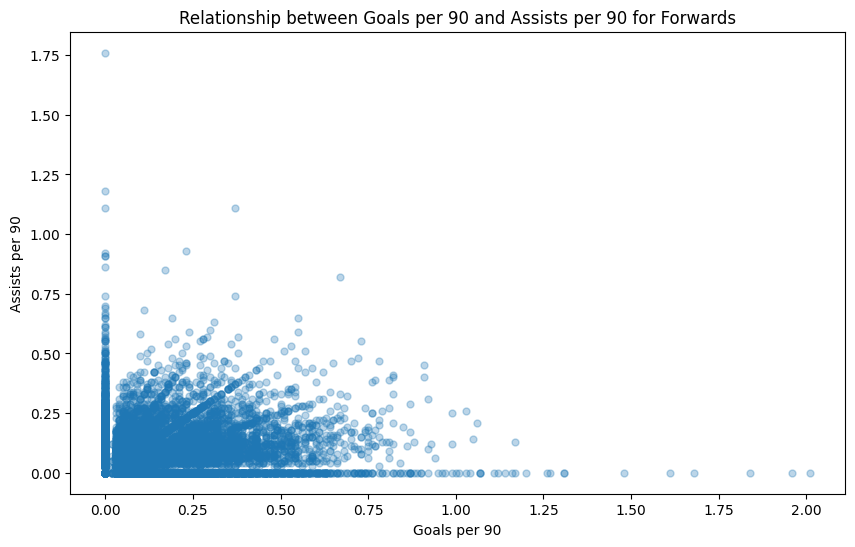

In [128]:
# Creating a new column 'Forwards' based on whether 'Position' contains 'F'
NAC_data_df['Forwards'] = NAC_data_df['Position'].str.contains('F', case=False)

# Dropping rows with missing values in 'Goals per 90' and 'Assists per 90' for forwards
forwards_data = NAC_data_df.dropna(subset=['Goals per 90', 'Assists per 90'])

#Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(forwards_data['Goals per 90'], forwards_data['Assists per 90'], s=25, alpha=0.30)
ax.set_xlabel('Goals per 90')
ax.set_ylabel('Assists per 90')
ax.set_title('Relationship between Goals per 90 and Assists per 90 for Forwards')
plt.show()

15. Which players exceed in ‘Shots on target %' and how does it relate to their overall ‘Goal conversion %'?

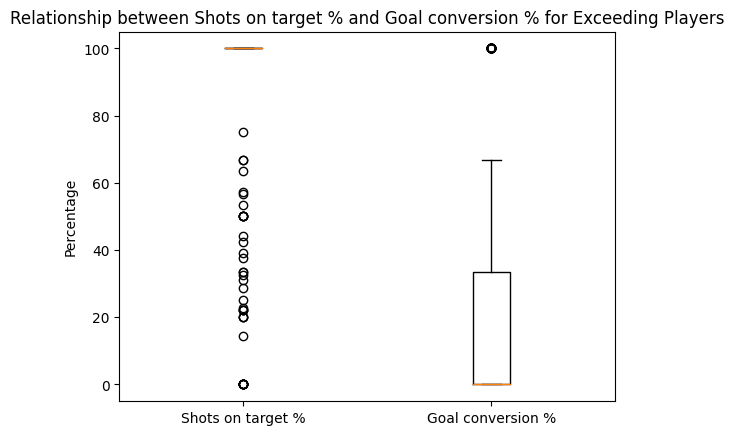

In [127]:
# Filtering for the highest percentage of shots on target by player
shots_on_target_by_player = NAC_data_df.groupby('Player')['Shots on target, %'].max()
exceeding_players = shots_on_target_by_player[shots_on_target_by_player == 100].index

# Filtering the DataFrame for exceeding players
exceeding_players_data = NAC_data_df[NAC_data_df['Player'].isin(exceeding_players)].copy()

# Converting columns to numeric (in case they are not already) and handling missing values
exceeding_players_data[['Shots on target, %', 'Goal conversion, %']] = exceeding_players_data[['Shots on target, %', 'Goal conversion, %']].apply(pd.to_numeric, errors='coerce')

# Boxplot
fig, ax = plt.subplots()
plt.boxplot([exceeding_players_data['Shots on target, %'].dropna(), exceeding_players_data['Goal conversion, %'].dropna()],
            labels=['Shots on target %', 'Goal conversion %'])
plt.ylabel('Percentage')
plt.title('Relationship between Shots on target % and Goal conversion % for Exceeding Players')
plt.show()

16. How do ‘Passes per 90' and ‘Accurate passes %' correlate for midfielders?

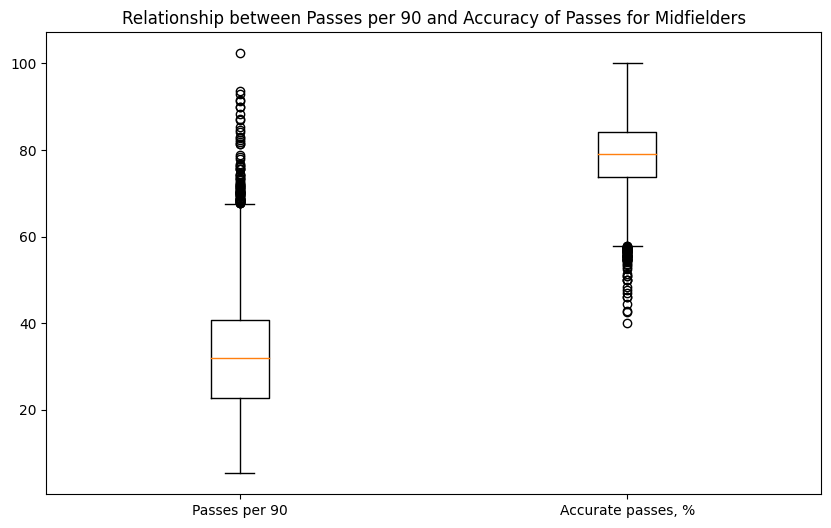

In [138]:
# Creating a new column indicating whether a player is a midfielder
NAC_data_df['Midfielders'] = NAC_data_df['Position'].str.contains('M', case=False)

# Filtering data for midfielders and drop rows with missing values in relevant columns
midfielder_data = NAC_data_df.dropna(subset=['Passes per 90', 'Accurate passes, %'])

#Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot([midfielder_data['Passes per 90'].dropna(), midfielder_data['Accurate passes, %'].dropna()],
            labels=['Passes per 90', 'Accurate passes, %'])
ax.set_ylabel('Values')
ax.set_title('Relationship between Passes per 90 and Accuracy of Passes for Midfielders')
plt.show()

17. Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?

Age
16.0    71.430000
17.0    64.522500
18.0    67.769429
19.0    66.972813
20.0    69.654935
21.0    66.438228
22.0    66.043012
23.0    68.585641
24.0    68.067403
25.0    69.013133
26.0    68.582614
27.0    69.683059
28.0    68.673231
29.0    68.170750
30.0    69.448657
31.0    69.462373
32.0    70.068491
33.0    68.660889
34.0    68.500625
35.0    68.163030
36.0    67.620625
37.0    70.408462
38.0    62.868333
39.0    65.322000
40.0    73.170000
41.0    73.806667
Name: Save rate, %, dtype: float64


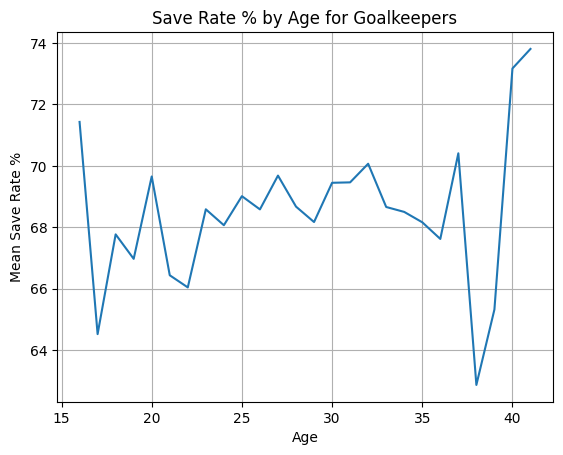

In [139]:
# Filtering df for goalkeepers
goalkeepers_df = NAC_data_df[NAC_data_df['Position'] == 'GK']

# Filtering the mean percentage of the save rate by goalkeepers' age
golie_trend = goalkeepers_df.groupby('Age')['Save rate, %'].mean()
print(golie_trend)

# Line chart
fig, axs = plt.subplots()
axs.plot(golie_trend.index, golie_trend) 
axs.set_title('Save Rate % by Age for Goalkeepers')
axs.set_xlabel('Age')
axs.set_ylabel('Mean Save Rate %')
axs.grid(True)
plt.show()

There seem to be a trendline for the percentage of the save rate for GK across different ages. The save rate appears to be at its peak for players aged 40.

18. What is the distribution of ‘Yellow cards per 90' and ‘Red cards per 90' across different positions

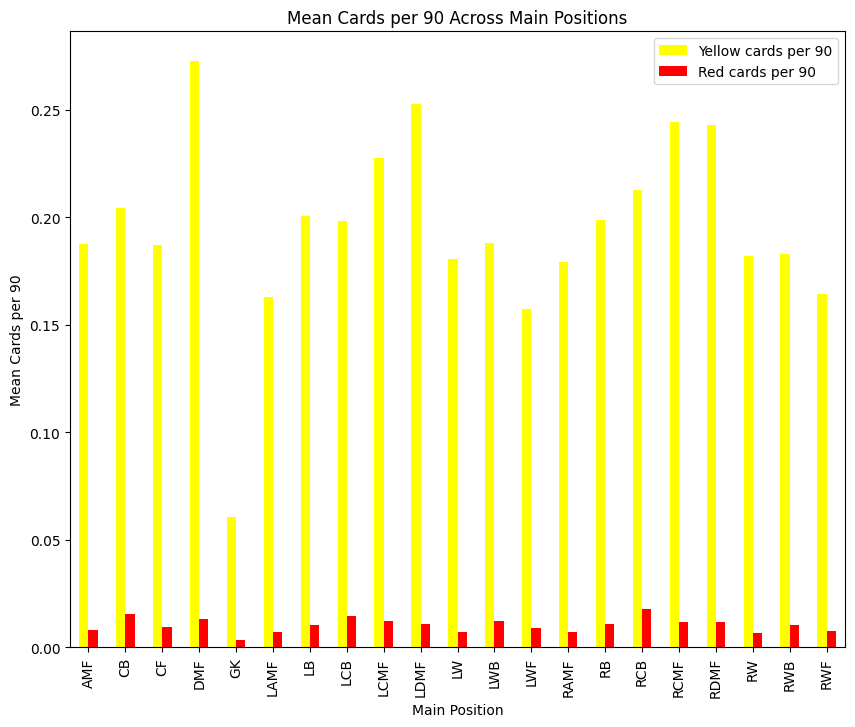

In [192]:
# Filtering out rows with missing values in relevant columns
cards_data = NAC_data_df.dropna(subset=['Position', 'Yellow cards per 90', 'Red cards per 90']).copy()

# Splitting the comma-separated positions and create a new column 'Main Position'
cards_data['Main Position'] = cards_data['Position'].str.split(',').str[0]

# Mean cards by 'Main Position'
position_stats = cards_data.groupby('Main Position')[['Yellow cards per 90', 'Red cards per 90']].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

position_stats.plot(kind='bar', ax=ax, color=['yellow', 'red'])
plt.title('Mean Cards per 90 Across Main Positions')
plt.xlabel('Main Position')
plt.ylabel('Mean Cards per 90')
plt.show()


19. How does ‘Fouls suffered per 90' compare for attackers and defenders?

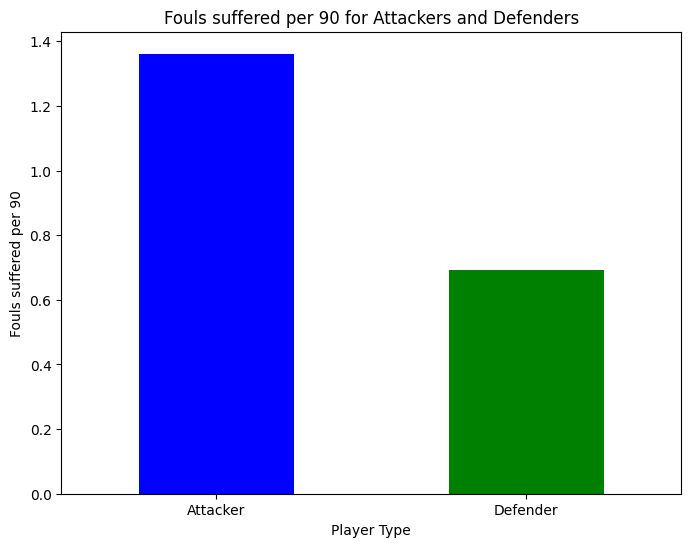

In [19]:
# Filtering out rows with missing values in relevant columns
fouls_data = NAC_data_df.dropna(subset=['Position', 'Fouls suffered per 90']).copy()

# Creating a new column 'Player Type' to categorize attackers and defenders
fouls_data['Player Type'] = fouls_data['Position'].apply(lambda x: 'Attacker' if 'F' in x else 'Defender')

# Mean Fouls suffered per 90 by 'Player Type'
fouls_stats = fouls_data.groupby('Player Type')['Fouls suffered per 90'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
fouls_stats.plot(kind='bar', ax=ax, color=['blue', 'green'])
plt.title('Fouls suffered per 90 for Attackers and Defenders')
plt.xlabel('Player Type')
plt.ylabel('Fouls suffered per 90')
plt.xticks(rotation=0)
plt.show()


20. Which players have the highest ‘Penalty conversion %' and what are their overall shooting statistics?

In [159]:
# Sorting the DataFrame based on 'Penalty conversion, %' in descending order
sorted_df = NAC_data_df.sort_values(by='Penalty conversion, %', ascending=False)

# Selecting specific columns for a new DataFrame
shot_conversion = sorted_df[['Player', 'Penalty conversion, %', 'Goals per 90', 'Shots on target, %', 'Goal conversion, %']]

print(shot_conversion)

                 Player  Penalty conversion, %  Goals per 90  \
4708          N. Besara                  100.0          0.28   
14296        J. Mathieu                  100.0          0.47   
6577   G. Mollo Bessala                  100.0          0.44   
14302         N. Bannis                  100.0          0.38   
2453               Cadu                  100.0          0.21   
...                 ...                    ...           ...   
5791       P. Malarczyk                    0.0          0.17   
5792        J. Carolina                    0.0          0.00   
5793          T. Kupisz                    0.0          0.13   
5794           W. Łaski                    0.0          0.22   
16534       I. Mihaylov                    0.0          0.21   

       Shots on target, %  Goal conversion, %  
4708                34.69              12.245  
14296               50.00              30.769  
6577                60.00              23.333  
14302               44.44              